### 지역별 전기차 증가율에 따른 지역선정

In [189]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [140]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [231]:
df = pd.read_csv('./data/1.전기차/지역별_전기차_대수_현황.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     38 non-null     object
 1   서울      38 non-null     int64 
 2   인천      38 non-null     int64 
 3   경기      38 non-null     int64 
 4   강원      38 non-null     int64 
 5   충북      38 non-null     int64 
 6   충남      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   세종      38 non-null     int64 
 9   경북      38 non-null     int64 
 10  대구      38 non-null     int64 
 11  전북      38 non-null     int64 
 12  전남      38 non-null     int64 
 13  광주      38 non-null     int64 
 14  경남      38 non-null     int64 
 15  부산      38 non-null     int64 
 16  울산      38 non-null     int64 
 17  제주      38 non-null     int64 
 18  합계      38 non-null     int64 
dtypes: int64(18), object(1)
memory usage: 5.8+ KB


,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,22336.736842,5546.736842,20707.868421,3941.500000,4093.868421,5156.710526,4186.315789,1151.289474,6326.526316,12119.500000,3545.236842,5071.789474,3233.526316,6383.236842,5807.552632,2085.947368,20531.315789,132225.657895
std,10114.803908,3862.084374,11517.094205,2101.635152,2320.274625,2964.352406,2189.858926,412.922930,3028.657902,2915.759173,2142.482854,2163.737709,1210.874639,3505.508317,3823.806924,857.254636,3217.806035,57949.273105
min,9571.000000,1298.000000,6493.000000,1393.000000,1205.000000,1142.000000,1358.000000,402.000000,2017.000000,6885.000000,1005.000000,1997.000000,1446.000000,2123.000000,1589.000000,862.000000,15268.000000,56085.000000
25%,13271.250000,2458.500000,11213.750000,2400.000000,2306.250000,2697.000000,2409.500000,876.000000,3886.750000,10118.250000,1813.250000,3290.000000,2371.750000,3600.500000,2787.750000,1258.750000,17994.250000,84764.750000
50%,21557.500000,4421.500000,17854.500000,3215.500000,3393.000000,4399.500000,3710.500000,1088.000000,5608.000000,12509.000000,2941.500000,4667.500000,3098.500000,5310.000000,4370.000000,2173.000000,20903.000000,121221.500000
75%,28317.250000,7519.500000,29258.500000,5087.500000,5348.000000,7087.500000,5682.500000,1391.250000,8536.500000,13848.500000,4936.000000,6537.750000,4014.000000,8480.500000,8256.000000,2856.250000,22665.500000,169823.000000
max,43206.000000,14134.000000,45891.000000,8652.000000,9683.000000,11532.000000,8595.000000,2069.000000,12318.000000,17584.000000,8404.000000,9978.000000,6015.000000,14371.000000,15330.000000,3789.000000,26702.000000,258253.000000


In [234]:
df_all = df.drop(columns='합계')

### 기준일 형식 > datetime 변경

In [235]:
df_all['기준일'] = pd.to_datetime(df['기준일'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     38 non-null     datetime64[ns]
 1   서울      38 non-null     int64         
 2   인천      38 non-null     int64         
 3   경기      38 non-null     int64         
 4   강원      38 non-null     int64         
 5   충북      38 non-null     int64         
 6   충남      38 non-null     int64         
 7   대전      38 non-null     int64         
 8   세종      38 non-null     int64         
 9   경북      38 non-null     int64         
 10  대구      38 non-null     int64         
 11  전북      38 non-null     int64         
 12  전남      38 non-null     int64         
 13  광주      38 non-null     int64         
 14  경남      38 non-null     int64         
 15  부산      38 non-null     int64         
 16  울산      38 non-null     int64         
 17  제주      38 non-null     int64         
dtypes: datetime6

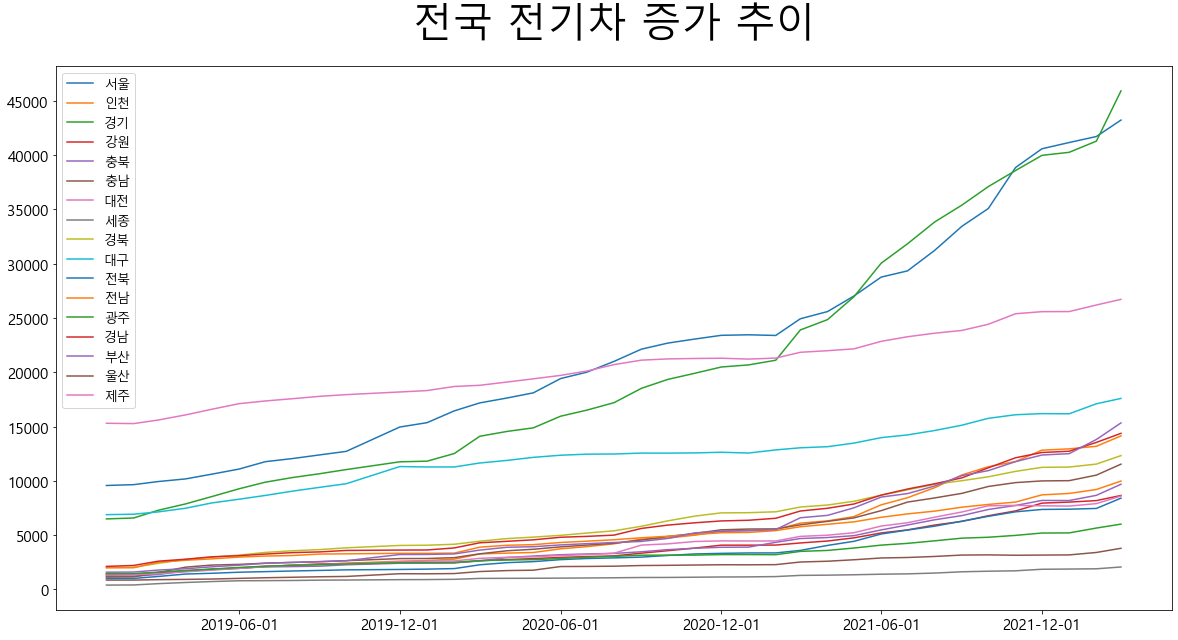

In [228]:
# 그래프 크기 조정
plt.figure(figsize= (20,10)) # 너비, 높이 지정
plt.plot(df_all['기준일'],df_all.drop(columns='기준일'))
plt.legend(df_all.drop(columns='기준일'),loc ='upper left',fontsize = 13)
# 그래프 전체 제목 넣기
plt.title('전국 전기차 증가 추이',pad = 30,fontsize = 40)
# x축, y축 이름달기
# x축 범위 지정
plt.xticks(['2019-06','2019-12','2020-06','2020-12','2021-06','2021-12'],fontsize = 15) # 리스트
plt.yticks(range(0,50000,5000),fontsize = 15) # 리스트

plt.show()

### 증가율, 비율 구해보기(연습)

In [135]:
df_seoul = df[['기준일','서울']].loc[::-1].reset_index(drop=True)
seoul_total = df_seoul['서울'].loc[37]
round(df_seoul['서울'].loc[0] / seoul_total * 100, 0)

22.0

In [136]:
seoul_list = []
for i in range(len(df_seoul)):
    seoul_list.append(round(df_seoul['서울'].loc[i] / seoul_total * 100, 0))
df_seoul['비율(%)'] = seoul_list
df_seoul

,기준일,서울,비율(%)
0,2019-01-01,9571,22.0
1,2019-02-01,9647,22.0
2,2019-03-01,9934,23.0
3,2019-04-01,10175,24.0
4,2019-05-01,10613,25.0
5,2019-06-01,11082,26.0
6,2019-07-01,11764,27.0
7,2019-08-01,12050,28.0
8,2019-09-01,12389,29.0
9,2019-10-01,12711,29.0


In [137]:

seoul_list2 = [0]
for i in range(1,len(df_seoul)):
    seoul_list2.append((df_seoul['비율(%)'].loc[i]) - (df_seoul['비율(%)'].loc[i-1]))
df_seoul['증가율'] = seoul_list2
df_seoul

,기준일,서울,비율(%),증가율
0,2019-01-01,9571,22.0,0.0
1,2019-02-01,9647,22.0,0.0
2,2019-03-01,9934,23.0,1.0
3,2019-04-01,10175,24.0,1.0
4,2019-05-01,10613,25.0,1.0
5,2019-06-01,11082,26.0,1.0
6,2019-07-01,11764,27.0,1.0
7,2019-08-01,12050,28.0,1.0
8,2019-09-01,12389,29.0,1.0
9,2019-10-01,12711,29.0,0.0


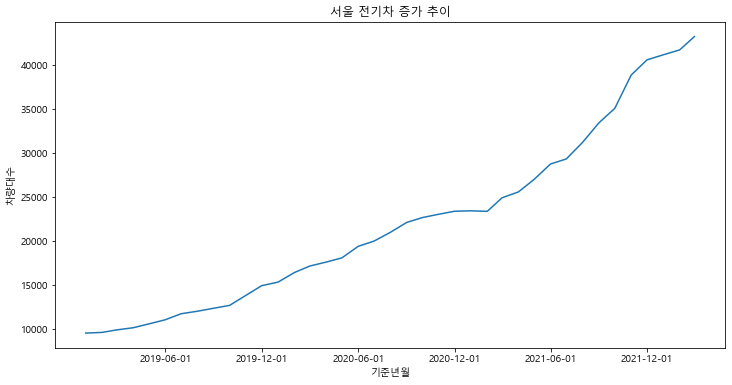

In [229]:
# 그래프 크기 조정
plt.figure(figsize= (12,6)) # 너비, 높이 지정
plt.plot(df_seoul['기준일'], df_seoul['서울'])
# 그래프 전체 제목 넣기
plt.title('서울 전기차 증가 추이')
# x축, y축 이름달기
plt.xlabel('기준년월')
plt.ylabel('차량대수')
# x축 범위 지정
plt.xticks(['2019-06','2019-12','2020-06','2020-12','2021-06','2021-12']) # 리스트

plt.show()
